# U.S. Clothing Store Retail Sales EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns 

In [2]:
clothing_sales = pd.read_csv("retailclothingsales.csv")

In [3]:
clothing_sales.head()

,DATE,MRTSSM4481USS
0,1992-01-01,6758
1,1992-02-01,6791
2,1992-03-01,6721
3,1992-04-01,6954
4,1992-05-01,6947


In [4]:
clothing_sales.shape

(339, 2)

In [5]:
clothing_sales.rename(columns = {'MRTSSM4481USS': 'sales', 'DATE':'date'}, inplace = True)
clothing_sales.head()

,date,sales
0,1992-01-01,6758
1,1992-02-01,6791
2,1992-03-01,6721
3,1992-04-01,6954
4,1992-05-01,6947


Text(0.5, 1.0, 'U.S. Clothing Retail Sales from 1992-2020')

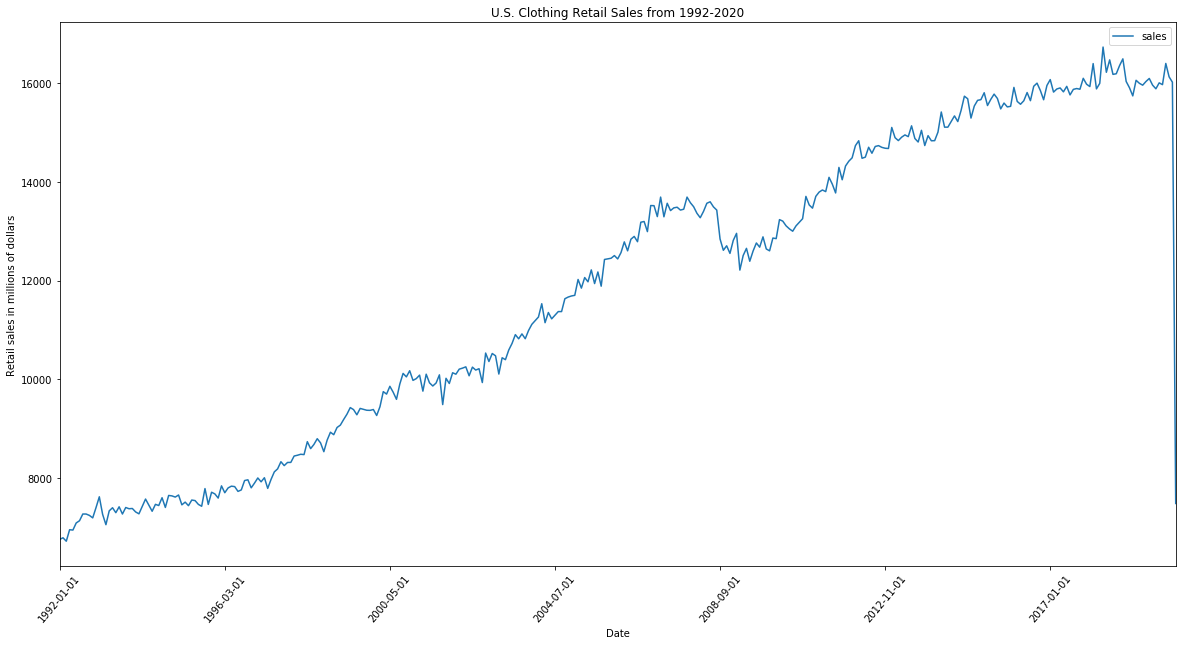

In [6]:
clothing_sales_fig = clothing_sales.plot.line(x='date',rot =50, figsize = (20,10))
clothing_sales_fig.set_xlabel('Date')
clothing_sales_fig.set_ylabel('Retail sales in millions of dollars')
clothing_sales_fig.set_title('U.S. Clothing Retail Sales from 1992-2020')

In [7]:
inflation_rates = pd.read_csv("inflation_values.csv")
inflation_rates.head()

,Unnamed: 0,inflation rate in %,adjusted inflation
0,0,0.15%,0.998500
1,1,0.36%,0.994905
2,2,0.51%,0.989831
3,3,0.14%,0.988446
4,4,0.14%,0.987062


In [8]:
inflation_rates.shape

(339, 3)

In [9]:
inflation_rates.rename(columns = {'Unnamed: 0':'year'}, inplace = True)
inflation_rates.set_index('year')

,inflation rate in %,adjusted inflation
year,,
0,0.15%,0.998500
1,0.36%,0.994905
2,0.51%,0.989831
3,0.14%,0.988446
4,0.14%,0.987062
...,...,...
334,-0.05%,0.533561
335,-0.09%,0.534041
336,0.39%,0.531958


In [10]:
clothing_sales = clothing_sales.assign(inflation = inflation_rates['inflation rate in %']) 
clothing_sales = clothing_sales.assign(inflation_adjusted = inflation_rates['adjusted inflation']) 
clothing_sales.head()

,date,sales,inflation,inflation_adjusted
0,1992-01-01,6758,0.15%,0.998500
1,1992-02-01,6791,0.36%,0.994905
2,1992-03-01,6721,0.51%,0.989831
3,1992-04-01,6954,0.14%,0.988446
4,1992-05-01,6947,0.14%,0.987062


In [11]:
sales_inflated = []
for ind, row in clothing_sales.iterrows():
    if (ind == 0):
        sales = clothing_sales.loc[ind, 'sales'] 
        sales_inflated.append(sales)
    elif (ind == 339): 
        continue
    else:
        sales = clothing_sales.loc[ind, 'sales']
        percent_inflation = (clothing_sales.loc[ind-1, 'inflation_adjusted']) 
        adjusted = sales * percent_inflation
        sales_inflated.append(adjusted)

In [12]:
clothing_sales = clothing_sales.assign(sales_adjusted = sales_inflated)
clothing_sales.head()

,date,sales,inflation,inflation_adjusted,sales_adjusted
0,1992-01-01,6758,0.15%,0.998500,6758.000000
1,1992-02-01,6791,0.36%,0.994905,6780.813500
2,1992-03-01,6721,0.51%,0.989831,6686.759193
3,1992-04-01,6954,0.14%,0.988446,6883.287434
4,1992-05-01,6947,0.14%,0.987062,6866.731712


Text(0.5, 1.0, 'U.S. Clothing Retail Sales from 1992-2020')

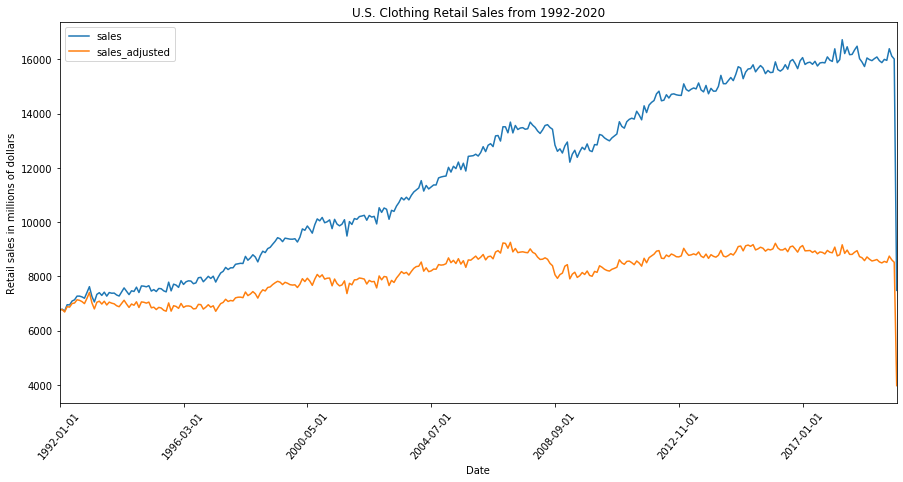

In [13]:
fig = clothing_sales.plot.line(x='date',y=['sales','sales_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('U.S. Clothing Retail Sales from 1992-2020')

Text(0.5, 1.0, 'U.S. Clothing Retail Sales from 1992-2020')

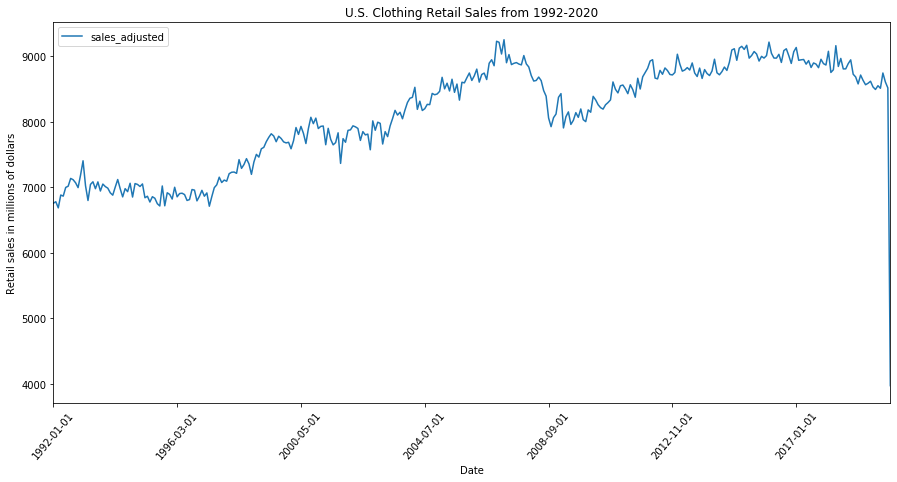

In [14]:
fig = clothing_sales.plot.line(x='date',y=['sales_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('U.S. Clothing Retail Sales from 1992-2020')